<a href="https://colab.research.google.com/github/BagMarFran/Proyecto_Final/blob/main/Desafio_FeatureSelection_Bagnasco_Frandsen_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>**Data Science Coderhouse**</u>

**Alumnos:**
- Facundo Bagnasco
- Ezequiel Frandsen
- Facundo Martinez


---



---



# **Abstracto**

Los depósitos a plazo fijo representan una fuente importante de ingresos para un banco. Un depósito a plazo fijo es una inversión en efectivo mantenida en una institución financiera. Su dinero se invierte a una tasa de interés acordada durante un período de tiempo o plazo fijo. El banco tiene varios estrategias de promoción para vender depósitos a plazo fijo a sus clientes, como marketing por correo electrónico, publicidad, marketing telefónico y marketing digital.

Las campañas de marketing telefónico siguen siendo una de las formas más efectivas de llegar a la gente. Sin embargo, requieren una gran inversión ya que se contratan grandes centros de llamadas para ejecutar estas campañas. Por lo tanto, es crucial identificar de antemano a los clientes con más probabilidades de invertir a plazo fijo para que puedan dirigirse específicamente a ellos a través de una llamada.

El dataset descripto anteriormente contiene datos con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa.
Los resultados del presente estudio podrían ser muy valiosos para poder reproducirse con datos de clientes de otras instituciones bancarias, de manera de optimizar las campañas de marketing que llevan a cabo y maximizar sus ganancias.



# **Hipótesis e ideas acerca del dataset**

El **objetivo** de este proyecto de marketing bancario es identificar posibles nuevos clientes a quienes ofrecerles depósitos a plazo fijo. Es decir, en base a las características socioeconómicas que se conocen de los individuos, lograr una campaña de marketing eficiente, donde se apunte a los candidatos que mayor probabilidades posean de aceptar el producto ofrecido, y se descarten otros sujetos que no sean adecuados o representen un riesgo de pérdida.

Además, en un análisis final se intentará desarrollar una herramienta que permita al banco ofrecer a sus clientes otra alternativa de inversión en la bolsa de valores.

**Para esto, los pasos que se van a seguir son:**

*   Limpieza de datos y primer análisis exploratorio de variables.
*   Feature engineering para complejizar y enriquecer el análisis.
*   Se planea ejecutar un análisis de clustering para comprender mejor los grupos socioeconómicos que tenemos en nuestra base de datos
*   Luego, con los grupos resultantes desarrollar modelos de Machine Learning más complejos que nos permitan comprender cuales de ellos deben ser apuntados a la campaña de marketing, y entender si es necesario descartar del proyecto a otros grupos.

**Hipótesis**

Las probabilidades de que el plazo fijo sea aceptado o no pueden estar fuertemente ligadas al nivel educativo, el trabajo, la edad, si el cliente tiene o no préstamos que está pagando y fundamentalmente el balance financiero.


Se intuye que a mayor nivel educativo, y con un balance financiero positivo y elevado, el individuo tiene mayor posibilidades de aceptar el plazo fijo. Así mismo, si posee una hipoteca o prestamos, las chances de aceptar el depósito podrían reducirse.


# Dataset: Bank Marketing
**Datos de los clientes del banco:**
1. age (numeric)
2. job : tipo de empleo (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
3. marital : estado civil (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
4. education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
5. default: tiene crédito en default? (categorical: ‘no’,’yes’,’unknown’)
6. balance: balance financiero
7. housing: tiene préstamo de vivienda?(categorical: ‘no’,’yes’,’unknown’)
8. loan: tiene prestamo personal? (categorical: ‘no’,’yes’,’unknown’)

**Relacionado con el último contacto de la campaña actual:**
9. contact: tipo de contacto realizado (categorical: ‘cellular’,’telephone’)
10. month: mes del último contacto (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
11. day_of_week: día de la semana del último contacto (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
12. duration: duración en segundos del último contacto (numeric). Nota importante: este atributo afecta en gran medida el objetivo de salida (por ejemplo, si duration=0 entonces y=’no’). Sin embargo, la duración no se conoce antes de que se realice una llamada. Además, después del final de la llamada "y" es obviamente conocido. Por lo tanto, esta entrada solo debe incluirse con fines de referencia y debe descartarse si la intención es tener un modelo predictivo realista.

**Otros atributos:**
13. campaign: número de contactos realizados durante esta campaña y para este cliente (numeric, incluye último contacto)
14. pdays: número de días transcurridos desde la última vez que se contactó al cliente de una campaña anterior (numeric; 999 significa que no se contactó al cliente previamente)
15. previous: número de contactos realizados antes de esta campaña y para este cliente (numeric)
16. poutcome: resultado de la campaña de marketing anterior (categorical: ‘failure’,’nonexistent’,’success’)
17. deposit: suscribió un depósito a plazo? (categorical: ‘no’,’yes’,)



In [110]:
#!pip install yfinance

In [111]:
import os
import re
import time
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from scipy import stats as scistats
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from google.colab import drive

import yfinance as yf

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [112]:
df_bank= pd.read_csv('/content/gdrive/MyDrive/Coderhouse/Data_Science/Equipo_data_science/Insights/bank.csv', sep=',')

In [113]:
df_bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [114]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [115]:
filas, columnas = df_bank.shape
print(f'El dataset contiene {filas} filas y {columnas} columnas')

El dataset contiene 11162 filas y 17 columnas


In [116]:
for col in df_bank.columns.values.tolist():
  print(f'La columna {col} tiene {df_bank[col].isna().sum()} NaNs')

La columna age tiene 0 NaNs
La columna job tiene 0 NaNs
La columna marital tiene 0 NaNs
La columna education tiene 0 NaNs
La columna default tiene 0 NaNs
La columna balance tiene 0 NaNs
La columna housing tiene 0 NaNs
La columna loan tiene 0 NaNs
La columna contact tiene 0 NaNs
La columna day tiene 0 NaNs
La columna month tiene 0 NaNs
La columna duration tiene 0 NaNs
La columna campaign tiene 0 NaNs
La columna pdays tiene 0 NaNs
La columna previous tiene 0 NaNs
La columna poutcome tiene 0 NaNs
La columna deposit tiene 0 NaNs


In [117]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [118]:
df_bank.duplicated().sum()

0

In [119]:
print('Cantidad de valores únicos de Jobs es:\n'+str(df_bank["job"].value_counts()))

Cantidad de valores únicos de Jobs es:
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


In [120]:
df_bank.groupby(["marital"]).mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,47.365043,1371.835267,15.689869,392.481825,2.457077,46.651199,0.664346
married,44.533617,1599.927570,15.678791,361.063769,2.621477,49.505432,0.822233
single,33.017339,1457.255259,15.608869,384.195566,2.323195,56.344798,0.913019


In [121]:
df_bank.marital.value_counts(normalize=True)

married     0.568984
single      0.315176
divorced    0.115839
Name: marital, dtype: float64

In [122]:
df_bank.groupby(["education"]).mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,48.220667,1523.031333,15.510667,383.803333,2.646000,39.976667,0.688000
secondary,40.086012,1296.480278,15.568846,373.344960,2.470051,53.302045,0.821768
tertiary,39.513147,1845.869070,15.782597,368.627812,2.487395,53.120629,0.924370
unknown,45.523139,1746.605634,16.160966,346.448692,2.672032,50.585513,0.706237


In [123]:
df_bank.education.value_counts(normalize=True)

secondary    0.490593
tertiary     0.330496
primary      0.134385
unknown      0.044526
Name: education, dtype: float64

In [124]:
df_bank.age.value_counts(normalize=True)

31    0.044436
32    0.042734
34    0.041749
33    0.041570
35    0.041301
        ...   
92    0.000179
93    0.000179
88    0.000179
95    0.000090
89    0.000090
Name: age, Length: 76, dtype: float64

# <u>Feature "Balance_status"</u>
Una instancia relevante de este estudio es comprender la situación financiera de nuestros clientes. Para ello, la primera **feature** que desarrollamos es una medida cualitativa del balance financiero de los individuos.

Esta feature es "Positivo" si tienen su balance de cuentas positivo, o será "Negativo" en el caso *contrario*

In [125]:
df_bank["Balance_status"] = ["Negativo" if x<=0 else "Positivo" for x in df_bank["balance"].values]

# <u>EDA: Primeros gráficos en Seaborn</u>

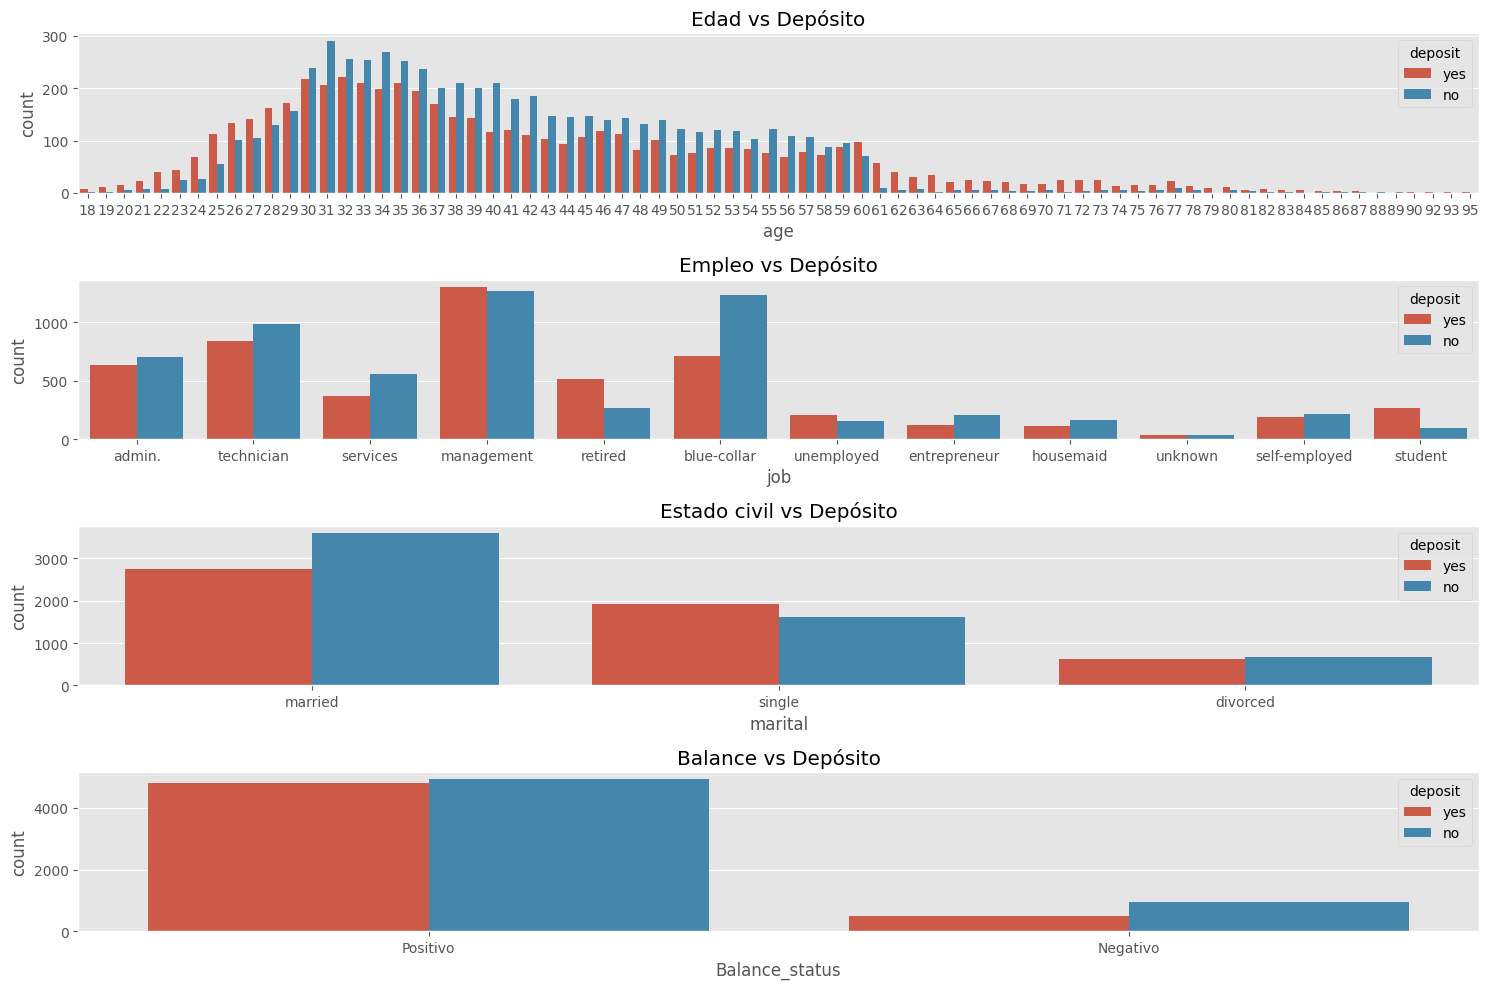

In [126]:
plt.figure(figsize=(15,10))
plt.subplot(4,1,1)
sns.countplot(data=df_bank, x='age',hue='deposit')
plt.title('Edad vs Depósito')

plt.subplot(4,1,2)
sns.countplot(data=df_bank, x='job',hue='deposit')
plt.title('Empleo vs Depósito')

plt.subplot(4,1,3)
sns.countplot(data=df_bank, x='marital',hue='deposit')
plt.title('Estado civil vs Depósito')

plt.subplot(4,1,4)
sns.countplot(data=df_bank, x='Balance_status',hue='deposit')
plt.title('Balance vs Depósito')
plt.tight_layout()
plt.show()


En estos 4 primeros gráficos de barras podemos observar:


*   Antes de los 30 años y después de los 60, los clientes en su mayoría prefieren depositar en el plazo fijo ofrecido.
*   Las profesiones donde se han logrado mejores resultados en la campaña de marketing de plazos fijos son de administración, estudiantes, jubilados y desempleados.
*   Los clientes casados son más propensos a rechazar la oferta (55%-45%), pero los solteros están más predispuestos a aceptarla (54%-46%). Entre los divorciados los valores son más parejos, practicamente un 50% para cada lado.
*   Los clientes con balance negativo se inclinan a rechazar nuestras ofertas, pero entre los que tienen balance positivo la proporción se mantiene pareja.



# <u>Correlaciones: búsqueda de posibles relaciones lineales entre variables</u>

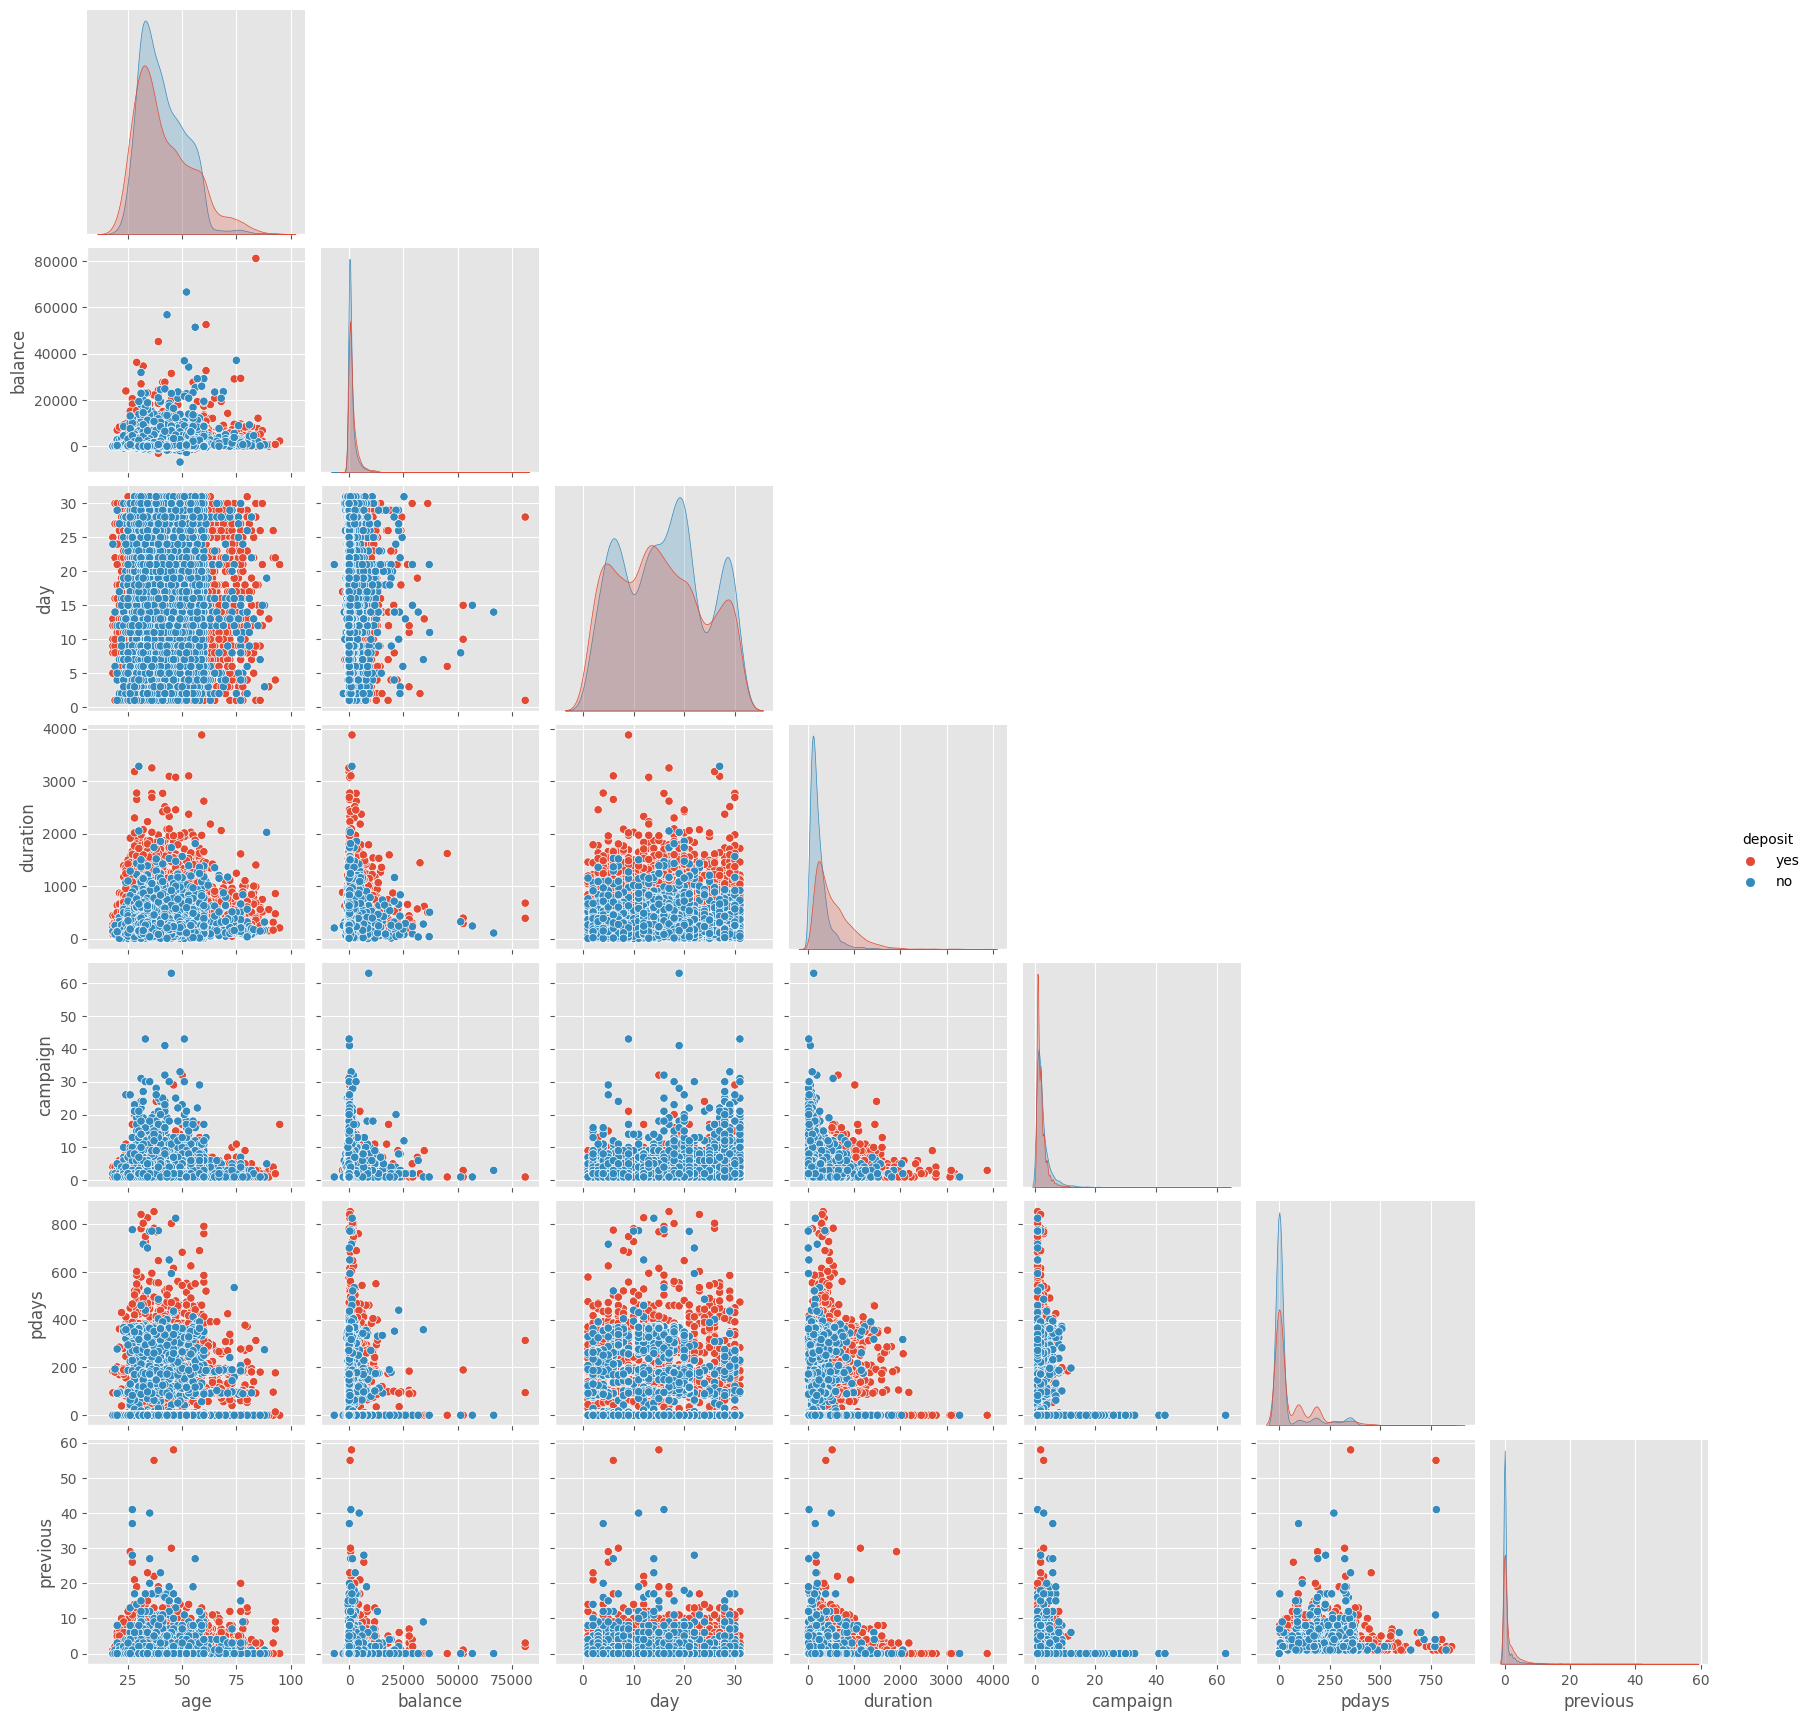

In [127]:
sns.pairplot(data=df_bank, hue='deposit', corner=True)
plt.show()

En los gráficos de correlaciones entre las variables manejadas no se logra observar una clara relación directa o indirecta entre las mismas

El gráfico anterior podría no terminar de ser del todo intuitivo a simple vista, por lo tanto, para contribuir mejor al análisis de las relaciones entre variables veamos que resultados nos muestra un **correlograma**

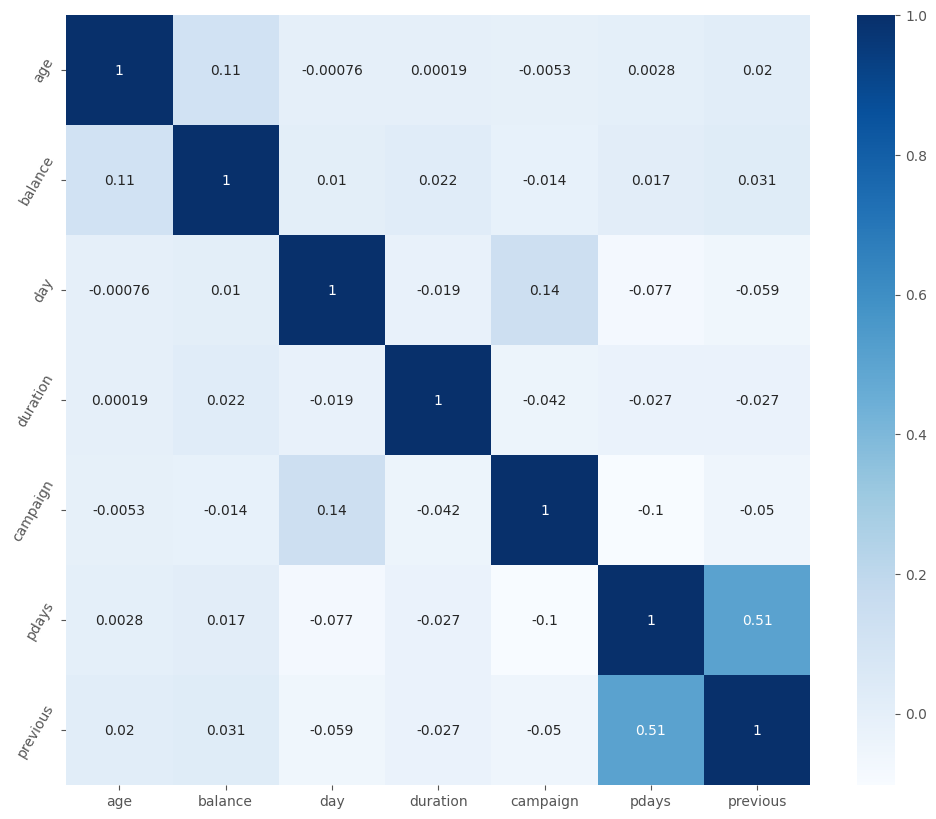

In [128]:
corr_df = df_bank.corr(method='pearson') 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df,cmap= "Blues", annot=True)
plt.yticks(rotation=60)
plt.show()

De lo anterior podemos observar que teniendo todos los distintos sujetos mezclados en la base de datos a priori no podemos encontrar relaciones lineales significativas entre nuestras variables. Por eso es que nos interesa segmentar nuestra información para poder eventualmente encontrar otros resultados.

# <u>Feature: "Edad_grupos"</u>

En esta primera segmentación se busca empezar a indagar la base de datos desde el punto de vista etario, con un filtro muy simple que divide los datos en 3 muestras de individuos Jóvenes (18-30 años), Adultos (30 a 60 años) y de Tercera edad (60 años en adelante).

In [129]:
df_bank["Edad_grupos"] = ["Joven" if 18<=x<30 else "Adulto" if 30<=x<60 else "Tercera edad" for x in df_bank["age"]] # Se usará más adelante

In [130]:
df_bank.Edad_grupos.value_counts(normalize=True)

Adulto          0.791166
Joven           0.138954
Tercera edad    0.069880
Name: Edad_grupos, dtype: float64

A continuación, utilizando los grupos etarios definidos anteriormente, separemos aquellos que han depositado a plazo fijo de quienes no lo han hecho.

In [131]:
bankboxplot = pd.DataFrame(
    {
        'Joven depositó':df_bank[(df_bank["deposit"]=='yes') & (df_bank["Edad_grupos"]=="Joven")].balance,
     'Joven no depositó':df_bank[(df_bank["deposit"]=='no') & (df_bank["Edad_grupos"]=="Joven")].balance,
     'Adulto depositó':df_bank[(df_bank["deposit"]=='yes') & (df_bank["Edad_grupos"]=="Adulto")].balance,
     'Adulto no depositó':df_bank[(df_bank["deposit"]=='no') & (df_bank["Edad_grupos"]=="Adulto")].balance,
     'Tercera edad depositó':df_bank[(df_bank["deposit"]=='yes') & (df_bank["Edad_grupos"]=="Tercera edad")].balance,
     'Tercera edad no depositó':df_bank[(df_bank["deposit"]=='no') & (df_bank["Edad_grupos"]=="Tercera edad")].balance
    }
)

In [132]:
bankboxplot.columns.tolist()

['Joven depositó',
 'Joven no depositó',
 'Adulto depositó',
 'Adulto no depositó',
 'Tercera edad depositó',
 'Tercera edad no depositó']

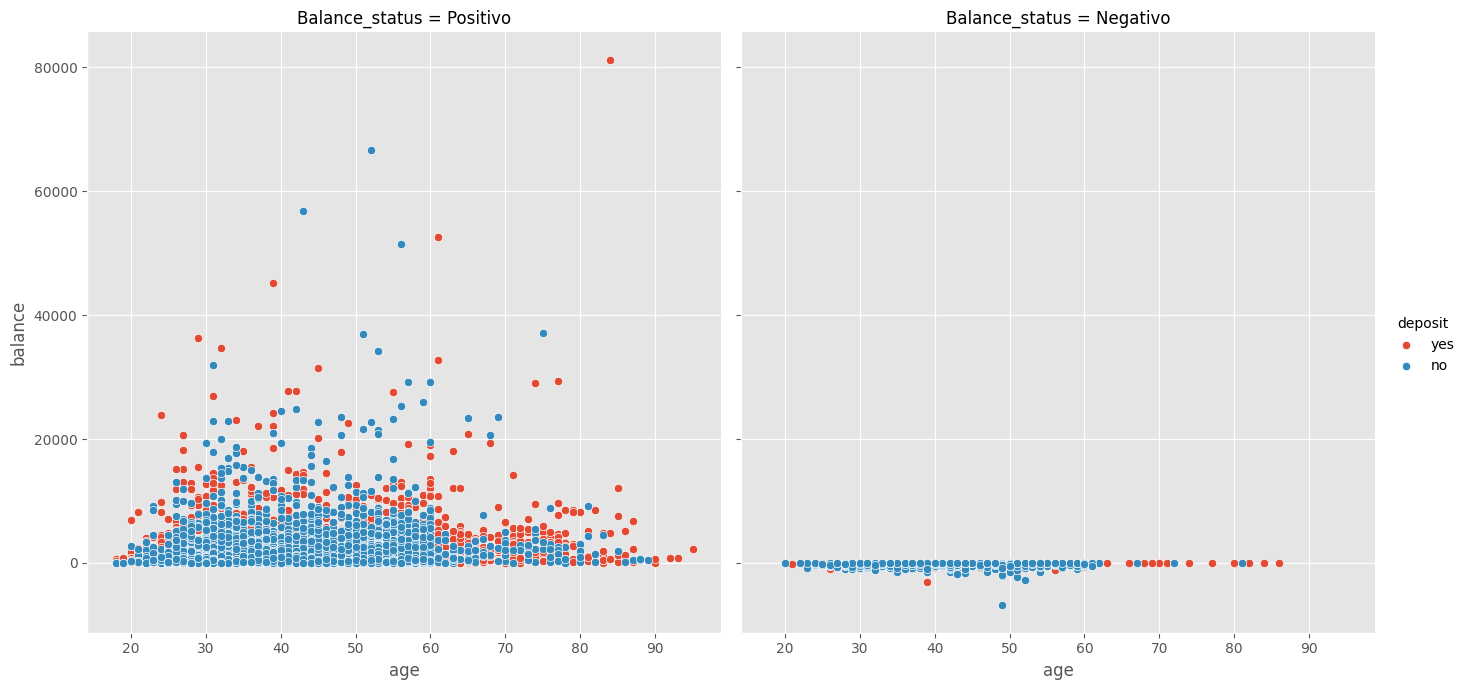

In [133]:
g = sns.FacetGrid(df_bank, col="Balance_status", hue="deposit", height=7)
g.map_dataframe(sns.scatterplot, x="age", y="balance")
g.add_legend()
plt.show()

Los scatterplots se separaron entre los clientes que tienen las cuentas en positivo y negativo.

La oferta de depósito se observa mayormente rechazada antes de los 60 años. En el grupo del balance negativo no se observan muchas excepciones antes de dicha edad.

In [134]:
mpl.style.use('ggplot')

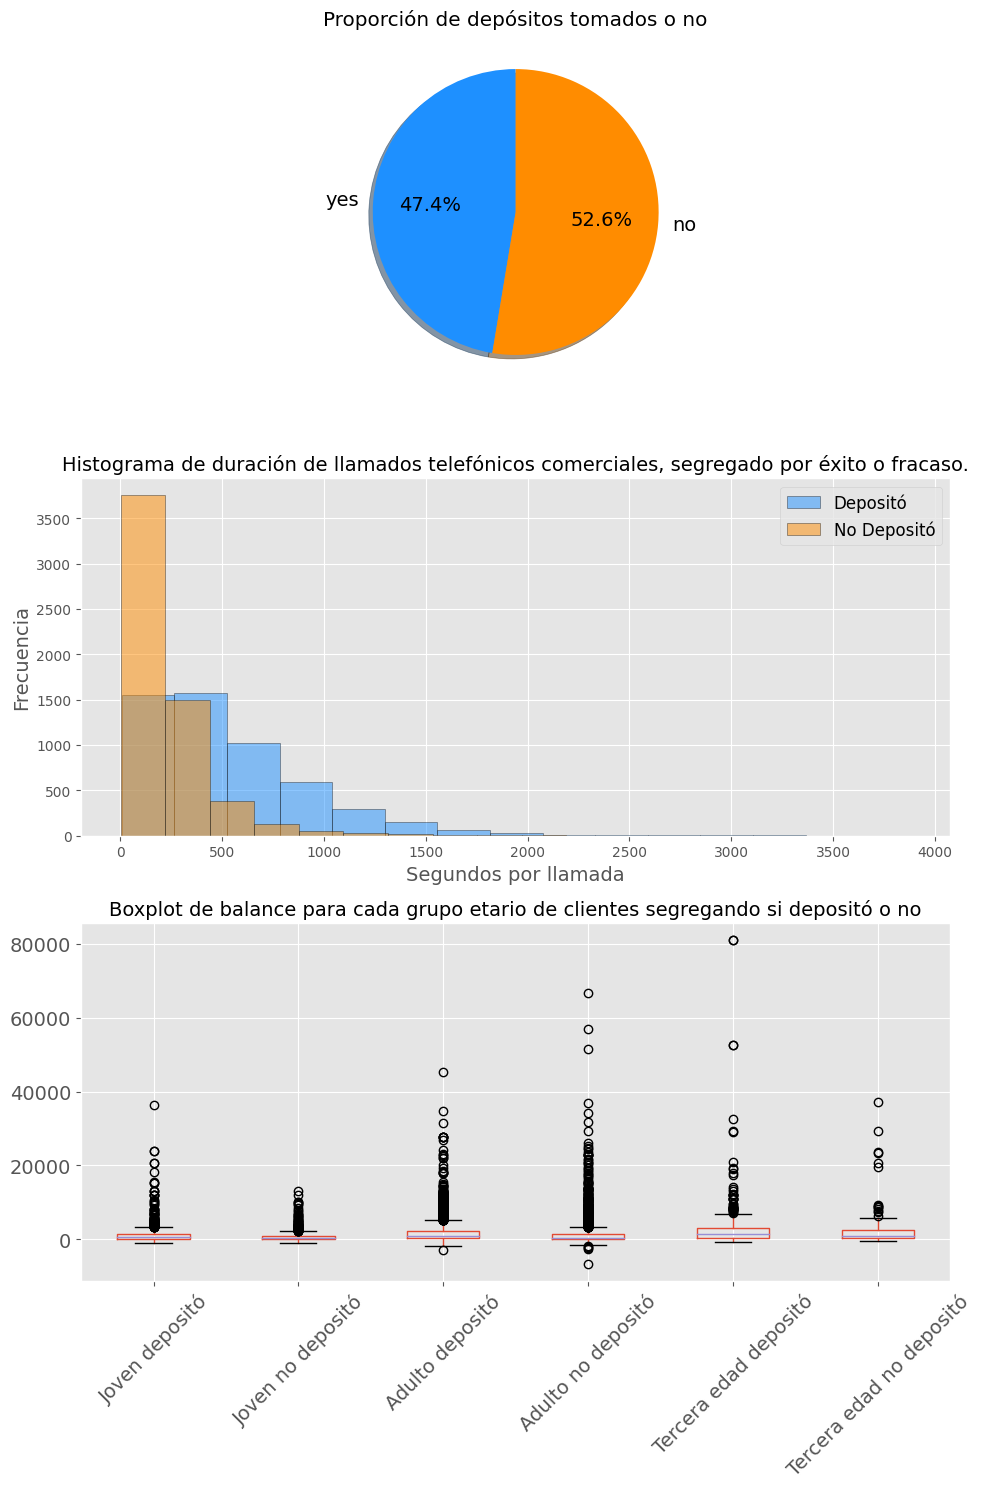

In [135]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,15))

ax[0].pie(df_bank["deposit"].value_counts(ascending=True), 
          labels=df_bank["deposit"].unique().tolist(),
          autopct='%1.1f%%',
          startangle=90,
          shadow=True,
          textprops={'fontsize': 14},
          colors=["dodgerblue", "darkorange"])
ax[0].set_title("Proporción de depósitos tomados o no")

ax[1].hist(df_bank[df_bank["deposit"]=='yes'].duration, 
           bins=15,
           #density=True,
           linewidth=0.5,
           edgecolor= "black",
           alpha=0.5,
           label="Depositó",
           color="dodgerblue"
           )
ax[1].hist(df_bank[df_bank["deposit"]=='no'].duration, 
           bins=15,
           #density=True,
           linewidth=0.5,
           edgecolor= "black",
           alpha=0.5,
           label="No Depositó",
           color="darkorange",
           )
ax[1].set_ylabel("Frecuencia", fontsize=14)
ax[1].set_xlabel("Segundos por llamada", fontsize=14)
ax[1].set_title("Histograma de duración de llamados telefónicos comerciales, segregado por éxito o fracaso.", fontsize=14)
ax[1].legend(loc='upper right', fontsize="large")

ax[2] = bankboxplot.boxplot(fontsize=14)
ax[2].xaxis.set_tick_params(rotation=45)
ax[2].set_title("Boxplot de balance para cada grupo etario de clientes segregando si depositó o no", fontsize=14)
plt.tight_layout()
plt.show()


De los 3 gráficos anteriores podemos concluir:


*   La base de datos de clientes que se maneja tiene mayor cantidad de sujetos que rechazan la oferta de depósito.
*   Las ofertas fueron rechazadas en su mayoria en llamados breves, lo que indicaría que el cliente tenía la certeza de no estar interesado o no se le insistió lo suficiente.
*   Entre los 3 grupos etarios analizados, los que no depositaron suelen tener outliers positivos de balance menores que los que sí depositaron, y además menores: medianas, intervalo intercuartil y máximos/mínimos.



# <u>Variables restantes y su relación con el depósito (o no) en plazo fijo<u/>.



Analicemos brevemente las variables de interés que aún no incluímos en los gráficos previos, y como es el comportamiento respecto al depósito de plazo fijo.

In [136]:
otras_vars = ['education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

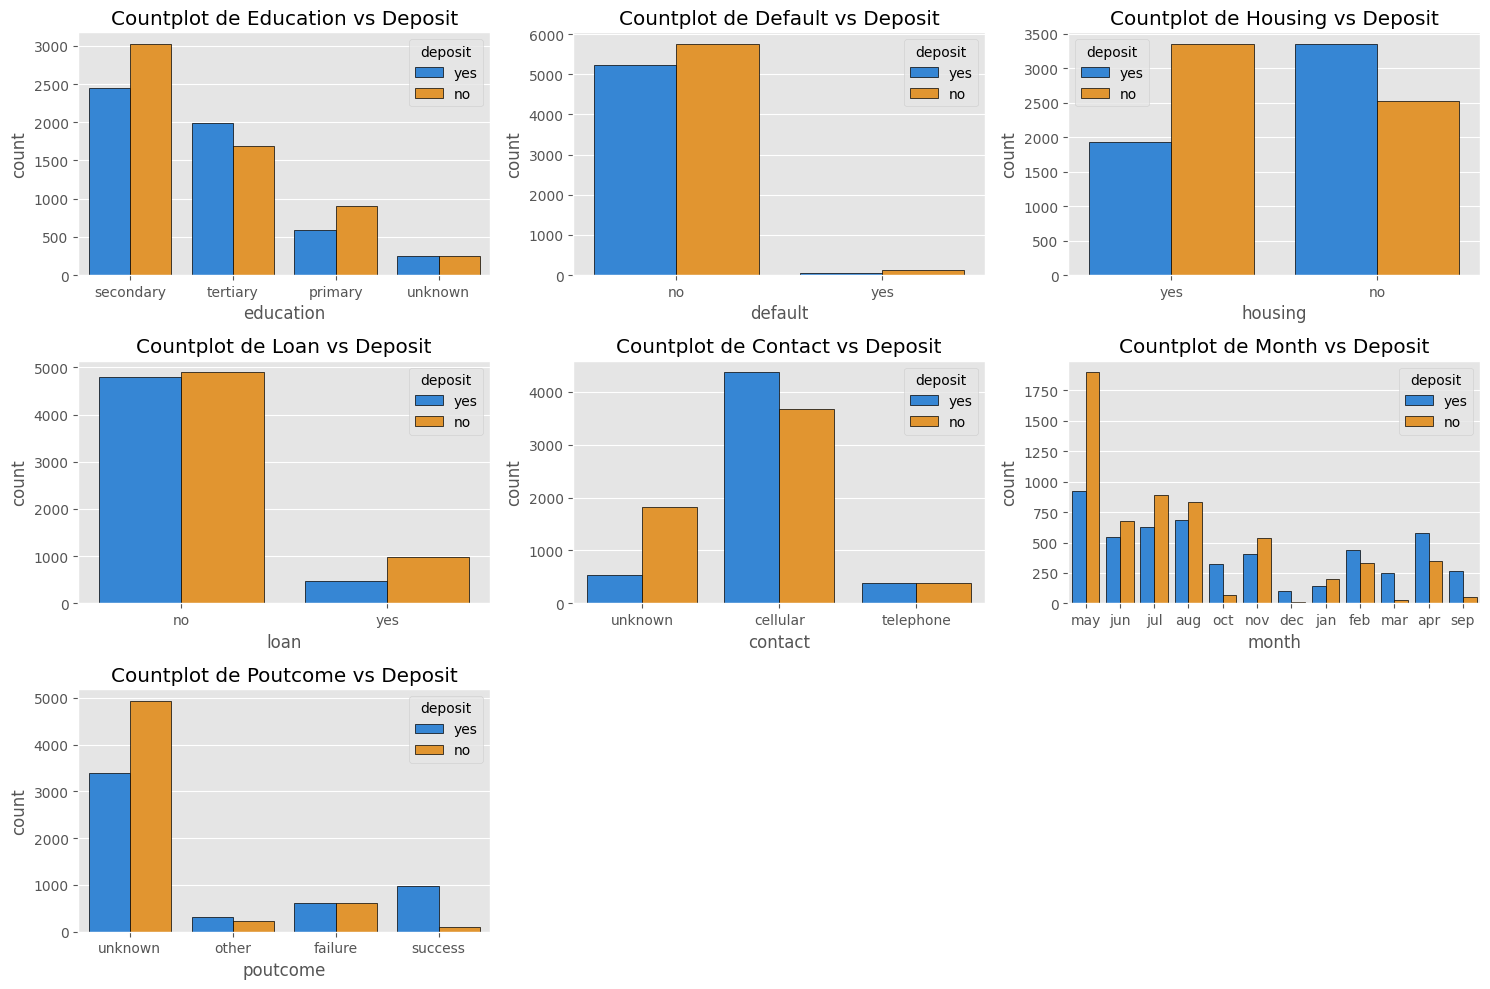

In [137]:
plt.figure(figsize=(15,10))
for i, var in enumerate(otras_vars):
    plt.subplot(3,3,i+1)
    sns.countplot(x=var,hue='deposit',data=df_bank,edgecolor="black", palette=['#1C86EE',"#FF9912"])
    plt.title("Countplot de {} vs Deposit".format(var.capitalize()))
plt.tight_layout()    
plt.show()

En base al gráfico anterior podemos resaltar que:


*   Los individuos que alcanzaron un nivel educativo terciario tienden a aceptar el depósito de plazo fijo, mientras que lo contrario para el resto. 
*   Aquellos que no tienen crédito en default tienden a rechazar el plazo fijo.
*   Los que están abonando una hipoteca tienden a rechazar el plazo fijo, mientras que ocurre los inverso con el grupo opuesto.
*   Los que tienen un préstamo asignado tienden a rechazar el plazo fijo.
*   Quienes fueron contactados por teléfono celular tienden a aceptar el plazo fijo.
*   Hay una gran cantidad de ofertas de plazo fijo rechazadas en el mes de mayo, mientras que en octubre, diciembre, febrero, marzo, abril y septiembre hay mayor cantidad de plazos fijos tomados que rechazados.




# Limpieza de datos

Vamos a asignar "nan" a aquellas variables que presenten valores "unknown"

In [138]:
df_bank_ok = df_bank.copy(deep=True)
for var in df_bank_ok.columns.values.tolist():
  if "unknown" in df_bank_ok[var].unique().tolist():
    df_bank_ok[var] = df_bank_ok[var].replace('unknown',np.nan)

In [139]:
df_bank_ok.isna().sum()

age                  0
job                 70
marital              0
education          497
default              0
balance              0
housing              0
loan                 0
contact           2346
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
poutcome          8326
deposit              0
Balance_status       0
Edad_grupos          0
dtype: int64

In [140]:
educacion = {u:v for u,v in zip(df_bank_ok.education.unique(), np.arange(len(df_bank_ok.education.unique())))}
empleo = {u:v for u,v in zip(df_bank_ok.job.unique(), np.arange(len(df_bank_ok.job.unique())))}
civil = {u:v for u,v in zip(df_bank_ok.marital.unique(), np.arange(len(df_bank_ok.marital.unique())))}
mes = {u:v for u,v in zip(df_bank_ok.month.unique(), np.arange(len(df_bank_ok.month.unique())))}

yesno = {"yes": 1, "no": 0}

In [141]:
X = df_bank_ok[[
    "age",
    "default",
    "balance",
    "housing",
    "loan",
    "duration"
]]

Y = df_bank_ok[['deposit']].replace(yesno).astype(int)

In [142]:
X.loc[:,"job"] = df_bank_ok.loc[:,"job"].replace(empleo).astype(int)
X.loc[:,"marital"] = df_bank_ok.loc[:,"marital"].replace(civil).astype(int)
X.loc[:,"education"] = df_bank_ok.loc[:,"education"].replace(educacion).astype(int)
X.loc[:,"month"] = df_bank_ok.loc[:,"month"].replace(mes).astype(int)
X.loc[:,"default"] = df_bank_ok.loc[:,"default"].replace(yesno).astype(int)
X.loc[:,"housing"] = df_bank_ok.loc[:,"housing"].replace(yesno).astype(int)
X.loc[:,"loan"] = df_bank_ok.loc[:,"loan"].replace(yesno).astype(int)

<ipython-input-142-6dd563b35f06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,"job"] = df_bank_ok.loc[:,"job"].replace(empleo).astype(int)
<ipython-input-142-6dd563b35f06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,"marital"] = df_bank_ok.loc[:,"marital"].replace(civil).astype(int)
<ipython-input-142-6dd563b35f06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

# Análisis de Fairness del dataset

Dado que este proyecto está directamente vinculado a personas y la posibilidad o no de acceder a un plazo fijo, es importante llevar a cabo un análisis de Fairness sobre aquellas variables que se consideren "sensibles".

La búsqueda de Fairness en el modelado involucra el estudio de las variables y sus asociaciones con parámetros sensibles como el género, la raza, la nacionalidad, estado civil y muchas más que no se desea que jueguen un papel relevante en la decisión de negocio.

Esto quiere decir que nos interesa mucho que el modelo no beneficie ni perjudique a nadie por parámetros externos a las condiciones económicas de los sujetos.

En nuestro caso, nos parece razonable realizar un estudio de Fairness con la variable "marital" que contiene información del estado civil de las personas.

Para medir el grado de asociación entre las variables del dataset y "marital" nos valdremos de una métrica estadística denominada "Cramer's V". Este devuelve valores entre [0-1] con "0" significando que no hay asociación entre variables, y "1" sería una asociación total.

In [143]:
def cramersv(var1: np.array, var2: np.array, correction: bool = False):
    """ 
        var1: Primera variable. Debe ser categorical 1d array y puede contener strings.
        var2: Segunda variable. Debe ser categorical 1d array y puede contener strings.
        correction: opcional para corregir sobreestimación de asociaciones, propuesta en Bergsma, Wicher (2013).

    Returns:
        Cramér's V (float en el rango [0,1])
    """
    contingency_table = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))

    n = contingency_table.sum()
    rows = contingency_table.shape[0]
    cols = contingency_table.shape[1]

    chi2 = scistats.chi2_contingency(contingency_table, correction=False)[0]
    phi_coeff_2 = chi2 / n

    if correction:
        phi_coeff_2 = max(0, phi_coeff_2 - (((cols - 1) * (rows - 1)) / (n - 1)))
        cols = cols - ((cols - 1)**2 / (n - 1))
        rows = rows - ((rows - 1)**2 / (n - 1))

    v = np.sqrt(
        phi_coeff_2 / min(cols - 1, rows - 1)
    )

    return v

In [144]:
data = pd.DataFrame({"age": df_bank.age})

In [145]:
data = data.merge(pd.get_dummies(df_bank["job"], drop_first=True, prefix='Job'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(df_bank["education"], drop_first=True, prefix='Education'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(df_bank["loan"], drop_first=True, prefix='Loan'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(df_bank["housing"], drop_first=True, prefix='Housing'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(df_bank["default"], drop_first=True, prefix='Default'), left_index=True, right_index=True)
data = data.merge(pd.get_dummies(df_bank["Balance_status"], drop_first=True, prefix='Balance_Status'), left_index=True, right_index=True)

In [146]:
data.drop(columns=["Job_unknown", "Education_unknown"])

,age,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Education_secondary,Education_tertiary,Loan_yes,Housing_yes,Default_yes,Balance_Status_Positivo
0,59,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,56,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,41,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
3,55,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1
4,54,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
11158,39,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
11159,32,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
11160,43,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0


In [147]:
estado_civil = np.array(X.marital)
categoricals = data.columns.values.tolist()
assoc_values = []
for colname in categoricals:
    col = np.array(data.loc[:, colname].fillna('na'))
    assoc_values.append(cramersv(estado_civil, col, correction=True))
pd.Series(assoc_values, index=categoricals, name='Estado_civil')

age                        0.386403
Job_blue-collar            0.109021
Job_entrepreneur           0.057679
Job_housemaid              0.059846
Job_management             0.013445
Job_retired                0.172765
Job_self-employed          0.012979
Job_services               0.010107
Job_student                0.250200
Job_technician             0.058951
Job_unemployed             0.011586
Job_unknown                0.021551
Education_secondary        0.000000
Education_tertiary         0.121277
Education_unknown          0.000000
Loan_yes                   0.064803
Housing_yes                0.041865
Default_yes                0.014438
Balance_Status_Positivo    0.071669
Name: Estado_civil, dtype: float64

Vemos que el valor más alto es 0.39 aprox. para la edad (lo cual es natural). Con lo cual podemos afirmar que ninguna variable actúa como proxy de la variable sensible considerada, y podemos seguir adelante con el análisis teniendo la confianza que los modelos generados no tendrán ningún sesgo contra las personas por su estado civil.

# Técnicas de Machine Learning más avanzadas

Continuamos el análisis, en adelante sin la variable marital que contiene información del estado civil de las personas.

In [148]:
X= X.drop(columns=["marital"])

Agregamos al análisis la feature que generamos previamente asociada al balance económico de los individuos

In [149]:
X = pd.concat([X, df_bank_ok["Balance_status"]], axis =1)

In [150]:
X["Balance_status"] = X["Balance_status"].replace({"Positivo":1, "Negativo":0}).astype(int)
X

,age,default,balance,housing,loan,duration,job,education,month,Balance_status
0,59,0,2343,1,0,1042,0,0,0,1
1,56,0,45,0,0,1467,0,0,0,1
2,41,0,1270,1,0,1389,1,0,0,1
3,55,0,2476,1,0,579,2,0,0,1
4,54,0,184,0,0,673,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,257,5,2,10,1
11158,39,0,733,0,0,83,2,0,1,1
11159,32,0,29,0,0,156,1,0,3,1
11160,43,0,0,0,1,9,1,0,0,0


# Escalado de variables

Realizamos una estandarización sobre las variables de balance financiero (balance) y duración de la llamada (duration)

Por otra parte, realizamos un escalado de máximos y mínimos sobre la variable de edad (age)

In [151]:
standard_transformer = Pipeline(steps=[
        ('standard', StandardScaler())])

minmax_transformer = Pipeline(steps=[
        ('minmax', MinMaxScaler())])


preprocessor = ColumnTransformer(
        remainder='passthrough',
        transformers=[
            ('std', standard_transformer , ['balance', 'duration']),
            ('mm', minmax_transformer , ['age'])
        ])

X_scaled = preprocessor.fit_transform(X)

In [152]:
X_scaled_2 = pd.DataFrame(preprocessor.fit_transform(X), columns=[re.sub(r"^([\w]{1,})(\_\_)", "", x) for x in preprocessor.get_feature_names_out()])
X_scaled_2

,balance,duration,age,default,housing,loan,job,education,month,Balance_status
0,0.252525,1.930226,0.532468,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.459974,3.154612,0.493506,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.080160,2.929901,0.298701,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.293762,0.596366,0.480519,0.0,1.0,0.0,2.0,0.0,0.0,1.0
4,-0.416876,0.867171,0.467532,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
11157,-0.473616,-0.331287,0.194805,0.0,1.0,0.0,5.0,2.0,10.0,1.0
11158,-0.246658,-0.832564,0.272727,0.0,0.0,0.0,2.0,0.0,1.0,1.0
11159,-0.464934,-0.622258,0.181818,0.0,0.0,0.0,1.0,0.0,3.0,1.0
11160,-0.473926,-1.045752,0.324675,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Clustering: Evaluamos los grupos socioeconómicos presentes con K-means

Buscamos el K más apropiado por el método del codo

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

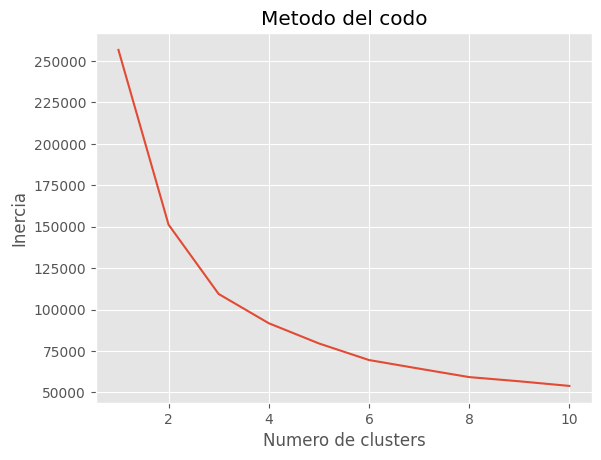

In [153]:
#calculando inercia
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled_2)
    wcss.append(kmeans.inertia_)

#graficando elbow method para escoger k
plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

Parece razonable avanzar K means con un K=3

In [154]:
kmeans = KMeans(n_clusters=3, random_state=3)
kmeans.fit(X_scaled_2)

labels = kmeans.predict(X_scaled_2)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [155]:
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 2700]
 [   1 2948]
 [   2 5514]]


In [156]:
X_scaled_2['cluster'] = pd.DataFrame(labels)

In [157]:
X_scaled_2

,balance,duration,age,default,housing,loan,job,education,month,Balance_status,cluster
0,0.252525,1.930226,0.532468,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2
1,-0.459974,3.154612,0.493506,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,-0.080160,2.929901,0.298701,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2
3,0.293762,0.596366,0.480519,0.0,1.0,0.0,2.0,0.0,0.0,1.0,2
4,-0.416876,0.867171,0.467532,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.473616,-0.331287,0.194805,0.0,1.0,0.0,5.0,2.0,10.0,1.0,0
11158,-0.246658,-0.832564,0.272727,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2
11159,-0.464934,-0.622258,0.181818,0.0,0.0,0.0,1.0,0.0,3.0,1.0,2
11160,-0.473926,-1.045752,0.324675,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2


In [158]:
pd.concat([X,Y], axis=1).groupby(X_scaled_2["cluster"]).mean()

,age,default,balance,housing,loan,duration,job,education,month,Balance_status,deposit
cluster,,,,,,,,,,,
0,42.079259,0.006667,1722.859259,0.353333,0.090370,360.548519,3.542222,0.742593,8.959259,0.913333,0.644444
1,39.682497,0.023745,1335.400271,0.542402,0.149254,386.261872,6.599729,0.916214,1.649932,0.847354,0.397218
2,41.645448,0.014509,1536.646173,0.494741,0.140733,369.969895,1.894995,0.630033,1.910591,0.858905,0.431266


Vamos entendiendo que hay determinados clusters que tienen más chances de concretar el depósito a plazo fijo.

# Split training-test

El dataset final incluye como feature extra el cluster al cual pertenece cada cliente, estimado con K means previamente

Elegimos una división 70-30

In [159]:
X_train, X_test, Y_train, Y_test  = train_test_split(X_scaled_2, Y, test_size = 0.3, random_state=788622)

In [160]:
X_train

,balance,duration,age,default,housing,loan,job,education,month,Balance_status,cluster
7679,-0.440440,-0.803755,0.285714,0.0,0.0,0.0,8.0,0.0,0.0,1.0,1
1163,-0.263711,3.477273,0.181818,0.0,1.0,0.0,0.0,0.0,8.0,1.0,0
10908,2.092682,0.103730,0.506494,0.0,0.0,0.0,8.0,2.0,5.0,1.0,1
1845,-0.363548,1.195594,0.311688,0.0,1.0,0.0,6.0,0.0,0.0,1.0,1
4312,-0.436410,3.249682,0.142857,0.0,1.0,0.0,10.0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
9417,0.718533,-0.449404,0.467532,0.0,1.0,1.0,4.0,0.0,1.0,1.0,2
6814,-0.465244,-0.437880,0.129870,0.0,0.0,0.0,11.0,0.0,7.0,1.0,1
8361,-0.203871,-0.581926,0.233766,0.0,0.0,0.0,3.0,1.0,5.0,1.0,2
7247,-0.468035,-0.299597,0.103896,0.0,0.0,0.0,11.0,3.0,10.0,1.0,0


# Regresión logística

In [161]:
model_logreg = LogisticRegression(max_iter=200)
model_logreg.fit(X_train, Y_train.values.ravel())

LogisticRegression(max_iter=200)

In [162]:
# Obtenemos las predicciones del modelo con X_test
preds_logreg = model_logreg.predict(X_test)

In [163]:
print(f"El score del modelo de regresión logística propuesto es de {model_logreg.score(X_test, Y_test)}")

El score del modelo de regresión logística propuesto es de 0.767990444908928


In [164]:
# Sumamos una cross-validation
k_folds = KFold(n_splits = 5)

scores_LR= cross_val_score(model_logreg, X_scaled_2, Y.values.ravel(), cv = k_folds,scoring='accuracy')

print("Accuracy Regresion Logistica para cada subconjunto: ", scores_LR)

print("Accuracy Regresion Logistica promedio: ", scores_LR.mean())

Accuracy Regresion Logistica para cada subconjunto:  [0.59561129 0.35915808 0.78315412 0.72401434 0.70340502]
Accuracy Regresion Logistica promedio:  0.6330685690529962


In [165]:
# Métricas del modelo de regresión logística
print(metrics.classification_report(Y_test, preds_logreg))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1753
           1       0.78      0.71      0.75      1596

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



## Evaluamos overfitting-underfitting en el modelo de regresion logistica

In [166]:
preds_train_LR = model_logreg.predict(X_train)
train_accuracy_LR = metrics.accuracy_score(Y_train, preds_train_LR)
print(f"El accuracy de entrenamiento es {train_accuracy_LR}") 

test_accuracy_LR = metrics.accuracy_score(Y_test, preds_logreg)
print(f"El accuracy de entrenamiento es {test_accuracy_LR}") 

El accuracy de entrenamiento es 0.7743504415717394
El accuracy de entrenamiento es 0.767990444908928


Las diferencias entre los accuracy son mínimas, y dado los valores se entiende que no hay overfitting o underfitting

# Máquinas de soporte vectorial

In [167]:
# Lo siguiente sirve para seleccionar los mejores parámetros para SVM pero con los recursos computacionales disponibles en google colab toma MUCHO (mucho) tiempo.
#param_grid = {
#        "C": [1, 5e3, 1e4, 1e5],
#        "gamma": [1, 0.01, 0.1],
#    }
#
#clf_svc = GridSearchCV(SVC(kernel="rbf", class_weight="balanced", probability=True), param_grid)
#clf_svc.fit(X_train, Y_train.values.ravel())

In [168]:
svc = SVC(kernel="linear", class_weight="balanced", probability=True)
svc.fit(X_train, Y_train.values.ravel())

SVC(class_weight='balanced', kernel='linear', probability=True)

In [169]:
# Obtenemos las predicciones del modelo con X_test
preds_svc = svc.predict(X_test)

In [170]:
print(f"El score del modelo de máquinas de soporte vectorial propuesto es de {svc.score(X_test, Y_test)}")

El score del modelo de máquinas de soporte vectorial propuesto es de 0.7676918483129292


In [171]:
# Métricas del modelo de máquinas de soporte vectorial
print(metrics.classification_report(Y_test, preds_svc))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1753
           1       0.76      0.76      0.76      1596

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



In [172]:
# Sumamos una cross-validation 
k_folds = KFold(n_splits = 5)

scores_SVC= cross_val_score(svc, X_scaled_2, Y.values.ravel(), cv = k_folds,scoring='accuracy')

print("Accuracy SVM para cada subconjunto: ", scores_SVC)

print("Accuracy SVM promedio: ", scores_SVC.mean())

Accuracy SVM para cada subconjunto:  [0.81683833 0.58038513 0.78046595 0.78494624 0.7688172 ]
Accuracy SVM promedio:  0.7462905713739973


# Evaluamos overfitting-underfitting en el modelo de SVM

In [173]:
preds_train_SVC = svc.predict(X_train)
train_accuracy_SVC = metrics.accuracy_score(Y_train, preds_train_SVC)
print(f"El accuracy de entrenamiento es {train_accuracy_SVC}") 

test_accuracy_SVC = metrics.accuracy_score(Y_test, preds_svc)
print(f"El accuracy de testeo es {test_accuracy_SVC}") 

El accuracy de entrenamiento es 0.7821579418917189
El accuracy de testeo es 0.7676918483129292


Nuevamente: Las diferencias entre los accuracy son mínimas, y dado los valores se entiende que no hay overfitting o underfitting

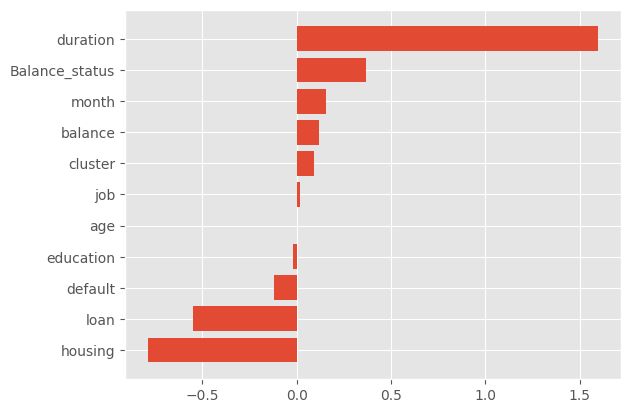

In [174]:
# Revisamos la importancia que el modelo de SVM le ha asignado a cada feature
def f_importances(coef, names):
    imp = coef.reshape(len(names),)
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = X_train.columns.values
f_importances(svc.coef_, features_names)

# Evaluación ML
En este caso quitaremos variables que no aportan al modelo y agregamos otras que no habian sido tenidas en cuenta, como el estado civil, el día del mes en el cual se llama al cliente, el número de días que pasaron desde que lo contactaron por última vez y el número de campaña en la cual se lo ha contactado.

In [175]:
X_new_feat = pd.concat([X, df_bank_ok[["marital", "day", "campaign", "pdays"]]], axis = 1)
X_new_feat["marital"] = X_new_feat["marital"].replace({"single":0, "married":1, "divorced":2}).astype(int)

In [176]:
standard_transformer = Pipeline(steps=[
        ('standard', StandardScaler())])

minmax_transformer = Pipeline(steps=[
        ('minmax', MinMaxScaler())])


preprocessor = ColumnTransformer(
        remainder='passthrough',
        transformers=[
            ('std', standard_transformer , ['balance', 'duration', 'campaign', 'pdays']),
            ('mm', minmax_transformer , ['age', 'day'])
        ])

X_scaled_3 = preprocessor.fit_transform(X_new_feat)

In [177]:
X_scaled_3 = pd.DataFrame(preprocessor.fit_transform(X_new_feat), columns=[re.sub(r"^([\w]{1,})(\_\_)", "", x) for x in preprocessor.get_feature_names_out()])

In [178]:
X_scaled_4 = X_scaled_3.drop(['age', 'job', 'education'], axis=1)
X_train, X_test, Y_train, Y_test  = train_test_split(X_scaled_4, Y, test_size = 0.3, random_state=788622)
svc = SVC(kernel="linear", class_weight="balanced", probability=True)
svc.fit(X_train, Y_train.values.ravel())
# Obtenemos las predicciones del modelo con X_test
preds_svc = svc.predict(X_test)

In [179]:
print(f"El score del modelo de máquinas de soporte vectorial propuesto es de {svc.score(X_test, Y_test)}")

El score del modelo de máquinas de soporte vectorial propuesto es de 0.7885936100328457


In [180]:
# Métricas del modelo de máquinas de soporte vectorial
print(metrics.classification_report(Y_test, preds_svc))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1753
           1       0.77      0.78      0.78      1596

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [181]:
# Sumamos una cross-validation 
k_folds = KFold(n_splits = 5)

scores_SVC= cross_val_score(svc, X_scaled_4, Y.values.ravel(), cv = k_folds,scoring='accuracy')

print("Accuracy SVM para cada subconjunto: ", scores_SVC)

print("Accuracy SVM promedio: ", scores_SVC.mean())

Accuracy SVM para cada subconjunto:  [0.78728168 0.62830273 0.78942652 0.78181004 0.7625448 ]
Accuracy SVM promedio:  0.7498731555183168


In [182]:
preds_train_SVC = svc.predict(X_train)
train_accuracy_SVC = metrics.accuracy_score(Y_train, preds_train_SVC)
print(f"El accuracy de entrenamiento es {train_accuracy_SVC}") 

test_accuracy_SVC = metrics.accuracy_score(Y_test, preds_svc)
print(f"El accuracy de testeo es {test_accuracy_SVC}") 

El accuracy de entrenamiento es 0.7920133111480865
El accuracy de testeo es 0.7885936100328457


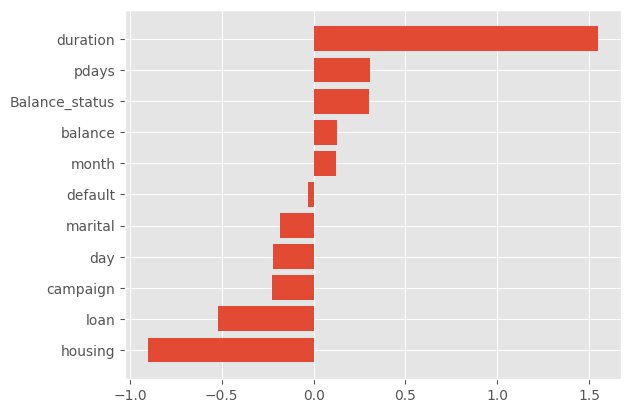

In [183]:
# Y Nuevamente revisamos la importancia que el modelo de SVM le ha asignado a cada feature
def f_importances(coef, names):
    imp = coef.reshape(len(names),)
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = X_train.columns.values
f_importances(svc.coef_, features_names)

# Llevaremos a cabo la selección de variables ahora implementando PCA.

Nos valdremos de la metodología de componentes principales con nuestro dataset previamente estandarizado, a fin de proporcionarle al modelo de máquinas de soporte vectorial las features que mayor varianza explican, es decir, aquellas variables que están más involucradas en las variaciones que llevan al cliente a aceptar o rechazar el plazo fijo propuesto.

In [184]:
pca = PCA()
pca.fit(X_scaled_3)

PCA()

Vemos la varianza explicada por cada componente principal

In [185]:
np.set_printoptions(suppress=True) 

print("Varianza explicada por cada componente (Porcentaje):")
print(np.round(pca.explained_variance_ratio_ * 100,2))


Varianza explicada por cada componente (Porcentaje):
[47.46 30.5   4.25  4.04  3.89  3.45  2.7   1.54  0.89  0.46  0.39  0.3
  0.07  0.06]


Y ahora analizamos la varianza explicada acumulada

In [186]:
print("Porcentaje de varianzas explicado (acumulativo):")
print(pca.explained_variance_ratio_.cumsum() * 100)

Porcentaje de varianzas explicado (acumulativo):
[ 47.45855238  77.95448431  82.20284963  86.24203924  90.13610702
  93.58574946  96.28760589  97.82795071  98.72250468  99.18319393
  99.57593548  99.87635901  99.94421838 100.        ]


Visualizamos lo anterior:

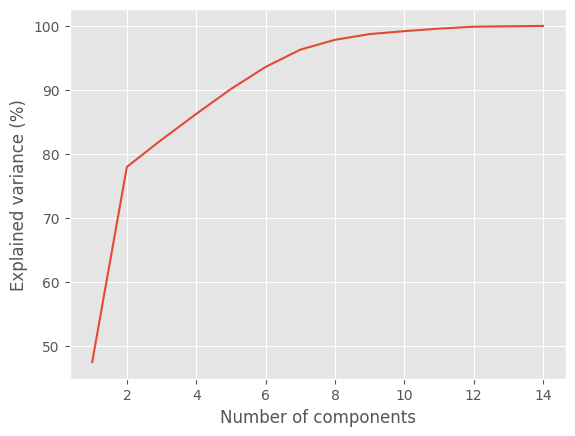

In [187]:
components = len(pca.explained_variance_ratio_) 
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

Resulta notable del gráfico anterior como a partir de 5 o 6 componentes la varianza explicada disminuye, formandose el "codo".

A continuación evaluamos la metodología, ahora quedandonos con las componentes principales que acumulen un 85% de varianza explicada.

Cumulative Variances (Percentage):
[47.45855238 77.95448431 82.20284963 86.24203924]
Number of components: 4


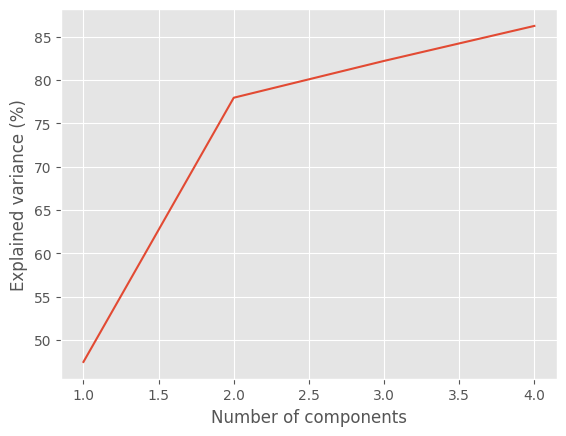

In [188]:
pca = PCA(n_components = 0.85)

pca.fit(X_scaled_3)

print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

El gráfico anterior no muestra ningún codo, lo cual nos asegura que no estamos agregando componentes que aporten valores despreciables de varianza explicada.

A partir de estos resultados, vamos a seleccionar las primeras 4 componentes principales para entrenar el modelo de SVM, ya que ellas juntas explican exactamente un 86.24% de varianza. Luego exploraremos los resultados de la clasificación que realiza el modelo generado con las métricas tradicionales.

In [189]:
X_pca = pca.transform(X_scaled_3)
print(X_pca.shape)
print(X_pca)

(11162, 4)
[[-3.74450469 -3.37863957 -0.92933255  1.60501844]
 [-3.73245448 -3.35814085 -1.11394177  2.05042189]
 [-3.7074509  -2.37821128 -1.162635    2.06676964]
 ...
 [-0.67413341 -2.53398177  0.32913218 -0.53203033]
 [-3.61637009 -2.42110091 -0.60850739 -1.51614293]
 [-1.68350926 -2.48595887 -0.31494597  0.33865126]]


In [190]:
X_train, X_test, Y_train, Y_test  = train_test_split(X_pca, Y, test_size = 0.3, random_state=788622, stratify=Y)
svc = SVC(kernel="linear", class_weight="balanced", probability=True)
svc.fit(X_train, Y_train.values.ravel())
# Obtenemos las predicciones del modelo con X_test
preds_svc = svc.predict(X_test)

In [191]:
print(f"El score del modelo de máquinas de soporte vectorial propuesto es de {svc.score(X_test, Y_test)}")

El score del modelo de máquinas de soporte vectorial propuesto es de 0.7438041206330248


In [192]:
# Métricas del modelo de máquinas de soporte vectorial
print(metrics.classification_report(Y_test, preds_svc))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1762
           1       0.73      0.73      0.73      1587

    accuracy                           0.74      3349
   macro avg       0.74      0.74      0.74      3349
weighted avg       0.74      0.74      0.74      3349



In [193]:
# Sumamos la cross-validation 
k_folds = KFold(n_splits = 5)

scores_SVC= cross_val_score(svc, X_pca, Y.values.ravel(), cv = k_folds,scoring='accuracy')

print("Accuracy SVM para cada subconjunto: ", scores_SVC)

print("Accuracy SVM promedio: ", scores_SVC.mean())

Accuracy SVM para cada subconjunto:  [0.74339454 0.5463502  0.74955197 0.74775986 0.74014337]
Accuracy SVM promedio:  0.7054399870306433


In [194]:
preds_train_SVC = svc.predict(X_train)
train_accuracy_SVC = metrics.accuracy_score(Y_train, preds_train_SVC)
print(f"El accuracy de entrenamiento es {train_accuracy_SVC}") 

test_accuracy_SVC = metrics.accuracy_score(Y_test, preds_svc)
print(f"El accuracy de testeo es {test_accuracy_SVC}") 

El accuracy de entrenamiento es 0.7418405222065788
El accuracy de testeo es 0.7438041206330248


De todo lo anterior podemos concluir que en nuestro caso de estudio, implementar una feature selection con PCA no nos ha mejorado la performance del modelo. A pesar que nos hemos quedado con las variables que mayor varianza explican, podrían haber otros fenómenos y relaciones detrás de los datos que fueron excluídos por el PCA, y eso llevaría a resultados de menor calidad.

# Revisión de los modelos aplicados

Podemos observar que de todos los modelos aplicados el de SVM tiene una ventaja sobre el resto en cuanto a los resultados de las predicciones que generó.
Además, las métricas evaluadas indican que podría ser un modelo bastante robusto para encontrar potenciales clientes que deseen aplicar a un plazo fijo.

No se ha detectado casos de overfitting/underfitting.

# Conclusiones


*   Del análisis exploratorio de datos inicial se pudo comprender gráficamente que existían relaciones entre diversas variables y features del dataset con la variable target, que en nuestro caso era "deposit" y representa el depósito o no de determinado cliente a plazo fijo.
   Esto nos permitió comprender el grupo socioeconómico al cual apuntar y comenzar a enfocar la estrategia comercial.

*   Los clientes que tendían a realizar depósitos a plazo fijo se ubicaban mayormente en edades inferiores a los 30 años y superiores a los 60, y con sus cuentas bancarias en positivo, con un nivel educativo terciario, sin hipotecas ni préstamos asignados. Además, se ha visto que las campañas realizadas en los meses de octubre, diciembre, febrero, marzo, abril y septiembre han tenido mayor éxito.
*   Teniendo en cuenta que el resultado del presente estudio iba a afectar directamente a las personas involucradas en las futuras campañas de marketing, se decidió realizar un análisis de fairness para descartar que el modelo generado tuviera cualquier tipo de sesgo por fuera de lo que refiere a la economía de los clientes. Para esto, como se deseaba desestimar del análisis el estado civil de los individuos, el análisis de fairness llevado a cabo se encargó de poner en números la insignificante relación de dicha variable con el resto.
*   Para el clustering decidimos implementar K-means, con K=3, y dicha información fue añadida al estudio posterior como una nueva feature.
*   Finalmente, se realizó un análisis más complejo empleando un escalado más sofisticado de las features del dataset, y recurriendo a la generación de un modelo de Regresión Logística y otro de Máquinas de Soporte Vectorial.

*   Realizando validaciones cruzadas, se encontró que el primer modelo tenía un accuracy promedio de 0.633, mientras que el segundo 0.746.

*   Para el modelo de SMV se realizó un cambio de features, quitando aquellas que no aportaban al modelo y sumando otras que habían sido excluídas del análisis. El accuracy promedio aumentó a 0.75.

*   El modelo de SVM generado puede resultar una herramienta muy valiosa para identificar potenciales clientes para las futuras campañas de marketing por los buenos resultados que ha evidenciado. En dicho modelo se ha comprobado que factores como la duración de la llamada y el balance económico del cliente son fundamentales a la hora de seleccionar candidatos, así como también afectan a la toma de decisión el hecho de que los sujetos estén pagando hipotecas o préstamos previos.




# Alternativa para los clientes: Inversiones en el mercado de valores

La institución bancaria ha decidido ofrecerle a los clientes una alternativa del plazo fijo: invertir en empresas que cotizan en la bolsa.

Para ello, se reunieron datos de empresas pertenecientes al grupo de 500 de S&P y mediante la API de Yahoo Finance se analiza los precios de cotización del último año para cada una dichas instituciones.

Esta información se procesará para informar a los clientes las mejores alternativas para invertir en caso de que no deseen invertir a plazo fijo por los riesgos que ello puede suponerles.

In [195]:
sp500url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
data_table = pd.read_html(sp500url)

In [196]:
tickers = data_table[0]['Symbol'].tolist()
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CV

In [197]:
stock_dict= {u:v for u,v in zip(data_table[0]['Symbol'].tolist(), data_table[0]['Security'].tolist())}

In [198]:
hoy = datetime.datetime.today()
str_hoy = '{}-{}-{}'.format(hoy.year, str(hoy.month).zfill(2), str(hoy.day).zfill(2))
print(str_hoy)

2023-04-06


In [199]:
snp_prices = yf.download(tickers, start = "2022-01-01", end = str_hoy, interval = "1h")['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [200]:
snp_prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2022-01-03 09:30:00-05:00,155.263000,19.100,239.389999,180.839996,134.789993,131.994995,138.315002,44.630001,408.825012,560.840027,...,88.690002,67.599998,62.869999,56.130001,118.440002,136.869995,125.262138,593.416992,64.839996,235.895004
2022-01-03 10:30:00-05:00,155.110901,18.875,235.559998,181.749893,133.929993,131.699997,137.835007,44.200001,407.040009,561.349976,...,88.449997,67.099998,63.020000,56.349998,116.959000,135.160004,125.524261,586.195007,64.535004,234.059998
2022-01-03 11:30:00-05:00,155.320007,18.775,235.729996,181.600006,134.210007,132.160004,138.445007,44.180000,407.329987,560.590027,...,87.620003,67.470001,63.082901,56.660000,117.419998,135.419998,125.116508,581.104980,64.419998,234.610001
2022-01-03 12:30:00-05:00,155.350006,18.795,234.994995,182.229706,134.250000,132.220001,138.072693,44.279999,406.739990,561.320007,...,87.684998,67.389999,63.309898,56.750000,116.419998,135.651794,125.106796,581.919983,64.250000,233.990005
2022-01-03 13:30:00-05:00,156.244995,18.760,236.630005,181.865005,134.675003,132.100006,138.490005,44.209999,407.864990,560.840027,...,87.910004,67.709999,63.480000,56.730000,117.014999,136.250000,125.378639,583.305481,63.845001,234.149994


In [201]:
df_prices = snp_prices.dropna(axis=1, how='all')

In [202]:
filas, columnas = df_prices.shape
print(f'El dataset contiene {filas} filas y {columnas} columnas')

El dataset contiene 2209 filas y 501 columnas


In [203]:
df_prices.index = pd.to_datetime(df_prices.index)
df_prices['TradeDate'] = df_prices.index.date
df_prices['time'] = df_prices.index.time

<ipython-input-203-885dd60c60d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['TradeDate'] = df_prices.index.date


In [204]:
df_prices.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,TradeDate,time
2022-01-03 09:30:00-05:00,155.263000,19.100,239.389999,180.839996,134.789993,131.994995,138.315002,44.630001,408.825012,560.840027,...,62.869999,56.130001,118.440002,136.869995,125.262138,593.416992,64.839996,235.895004,2022-01-03,09:30:00
2022-01-03 10:30:00-05:00,155.110901,18.875,235.559998,181.749893,133.929993,131.699997,137.835007,44.200001,407.040009,561.349976,...,63.020000,56.349998,116.959000,135.160004,125.524261,586.195007,64.535004,234.059998,2022-01-03,10:30:00
2022-01-03 11:30:00-05:00,155.320007,18.775,235.729996,181.600006,134.210007,132.160004,138.445007,44.180000,407.329987,560.590027,...,63.082901,56.660000,117.419998,135.419998,125.116508,581.104980,64.419998,234.610001,2022-01-03,11:30:00
2022-01-03 12:30:00-05:00,155.350006,18.795,234.994995,182.229706,134.250000,132.220001,138.072693,44.279999,406.739990,561.320007,...,63.309898,56.750000,116.419998,135.651794,125.106796,581.919983,64.250000,233.990005,2022-01-03,12:30:00
2022-01-03 13:30:00-05:00,156.244995,18.760,236.630005,181.865005,134.675003,132.100006,138.490005,44.209999,407.864990,560.840027,...,63.480000,56.730000,117.014999,136.250000,125.378639,583.305481,63.845001,234.149994,2022-01-03,13:30:00


In [205]:
SnP_subset = df_prices.between_time('09:30:00', '16:00:00').copy()
SnP_subset.sort_index(inplace=True)
SnP_subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2209 entries, 2022-01-03 09:30:00-05:00 to 2023-04-05 15:30:00-04:00
Columns: 503 entries, A to time
dtypes: float64(501), object(2)
memory usage: 8.5+ MB


In [206]:
nan_count = SnP_subset.isna().sum()
print(nan_count)

A            1
AAL          1
AAP          1
AAPL         1
ABBV         1
            ..
ZBRA         1
ZION         1
ZTS          1
TradeDate    0
time         0
Length: 503, dtype: int64


In [207]:
# Para la estimación de los faltantes realizamos una interpolación lineal con la información disponible.
SnP_subset = SnP_subset.interpolate(method ='linear', limit_direction ='forward')

In [208]:
SnP_subset.describe().T.sort_values("max", ascending=[False])

,count,mean,std,min,25%,50%,75%,max
NVR,2209.0,4642.877096,480.816419,3601.459961,4279.439941,4493.029785,5046.609863,5885.000000
BKNG,2209.0,2138.726030,272.488596,1627.675049,1917.329956,2113.689941,2395.290039,2705.000000
AZO,2209.0,2210.996183,211.908623,1713.030029,2035.324951,2182.830078,2415.989990,2605.360107
CMG,2209.0,1504.418230,121.675105,1200.349976,1411.280029,1521.109985,1592.634888,1747.989990
MTD,2209.0,1356.653200,134.025928,1082.599976,1244.459961,1362.630005,1465.714966,1674.685059
...,...,...,...,...,...,...,...,...
HPE,2209.0,15.185816,1.403514,11.910000,14.100000,15.560000,16.225000,17.729099
HBAN,2209.0,14.095701,1.359882,10.150000,13.325000,14.105000,15.080000,17.629999
PCG,2209.0,13.253660,1.989466,9.659900,11.830000,12.545000,15.470000,16.750000
VTRS,2209.0,11.075050,1.625361,8.460000,9.940000,10.825000,11.590000,15.535000


A priori se le podría ofrecer a nuestros clientes opciones de inversión en empresas que al último año supieron alcanzar los mayores precios de stock, por ejemplo:


*   NVR, Inc.
*   Booking
*   AutoZone
*   Chipotle Mexican Grill
*   Mettler Toledo


# Métrica: Simple Rate of Return (SRR)

A partir del primer análisis realizado, queremos también evaluar el SRR sobre las cotizaciones de las distintas empresas en un determinado período de tiempo.

El SRR o tasa de rendimiento es la medida del rendimiento de una inversión durante un período de tiempo, expresada como un porcentaje de su costo inicial. Un rendimiento positivo refleja una ganancia en el valor de la inversión, mientras que un rendimiento negativo refleja una pérdida de valor. Una tasa de rendimiento calcula el cambio porcentual en el valor de cualquier inversión, independientemente de si se mantiene o se vendió.

Compararemos las empresas de mayor cotización promedio con las que han tenido mayores valores de SRR.

Cronológicamente estudiaremos los últimos 15 días desde la fecha actual, para poder ofrecer a los clientes del banco la información más actualizada en el contexto de un mercado altamente dinámico.

Finalmente el cliente podrá decidir su inversión en base al desempeño que presentan las distintas empresas.

In [209]:
# Chequeamos la información de los últimos días. Modificar valor de variable "last_days"
last_days = 15 # cuantos días atrás queremos analizar
end_date = SnP_subset.index.max()
print(end_date)

2023-04-05 15:30:00-04:00


In [210]:
def srr(end_date, n_days, ticker):
  '''
  Realiza una estimación del Simple Rate of Return entre el rango de fechas determinado por 
  la fecha final del dataset y la correspondiente a la de n días previos ingresados 
  para determinada empresa.

  La ecuación del Simple Rate of Return es:
  Simple Rate of Return % = [(Current Value — Initial Value) / Initial Value] x 100

  # Parametros:
  - end_date: fecha final en formato date.
  - n_days: int. que indica los días previos a la end_date.
  - ticker: iniciales de la empresa según el índice Standard & Poor 500.

  # Devuelve:
  srr_value: Simple Rate of Return entre las fechas indicadas para la empresa.
  '''


  current = SnP_subset[SnP_subset.index > end_date - datetime.timedelta(days = n_days)][ticker][-1]
  initial = SnP_subset[SnP_subset.index > end_date - datetime.timedelta(days = n_days)][ticker][0]
  srr_value =((current - initial) / initial) * 100

  return np.round(srr_value, 2)

In [211]:
srr_dict = {col:srr(end_date, last_days, col) for col in SnP_subset.columns.values.tolist()[:-2]}
df_srr = pd.DataFrame([srr_dict], index = ["SRR"])

In [212]:
# También realizamos un recorte de información para los últimos días.
SnP_lastdays = SnP_subset[SnP_subset.index > (end_date - datetime.timedelta(days = last_days))]
SnP_lastdays.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS,TradeDate,time
2023-03-22 09:30:00-04:00,137.529999,14.3000,118.745102,160.064194,156.220001,156.240005,99.260002,67.320000,260.029999,373.980011,...,106.164703,37.299999,98.735001,129.000000,128.375000,293.640015,32.485001,165.679993,2023-03-22,09:30:00
2023-03-22 10:30:00-04:00,136.979996,14.1850,117.540001,160.220001,155.899994,156.214996,98.720001,66.870003,258.769989,371.640015,...,106.809998,37.205002,98.769997,128.710007,127.879997,292.809998,31.389999,164.199997,2023-03-22,10:30:00
2023-03-22 11:30:00-04:00,136.369995,14.1550,117.209999,159.615005,155.899994,156.524994,98.730003,66.894997,258.450012,369.230011,...,106.470001,37.134998,98.809998,128.919998,127.599998,291.130005,31.879999,163.990005,2023-03-22,11:30:00
2023-03-22 12:30:00-04:00,135.585007,14.1313,116.459999,160.039993,155.005005,156.470001,98.370003,66.849998,258.720001,370.739990,...,106.360001,36.959999,98.790001,128.524994,127.470001,291.630005,31.590000,164.029999,2023-03-22,12:30:00
2023-03-22 13:30:00-04:00,136.169998,14.2098,116.330002,161.190002,154.720001,156.220001,98.500000,66.760002,259.450012,372.500000,...,106.509903,37.200001,99.300003,128.895004,127.955002,294.779999,31.350000,164.119995,2023-03-22,13:30:00


También estaremos interesados en ver como estuvo el valor medio de las cotizaciones en los últimos 15 días

In [213]:
# Ahora hacemos el sort viendo la media del precio en los últimos n días propuestos anteriormente.
SnP_lastdays.describe(percentiles=[0.1, 0.5, 0.9]).T.sort_values("mean", ascending=[False]).head(10)

,count,mean,std,min,10%,50%,90%,max
NVR,77.0,5461.712853,68.445821,5305.899902,5386.803906,5448.220215,5560.668066,5598.910156
BKNG,77.0,2583.210788,54.741401,2473.620117,2510.502051,2592.810059,2654.087988,2671.199951
AZO,77.0,2412.670306,65.249123,2307.820068,2329.348047,2402.379883,2503.471973,2524.790039
CMG,77.0,1669.539316,35.358351,1609.800049,1630.812036,1654.869995,1716.452051,1734.839966
MTD,77.0,1495.783156,29.222722,1435.359985,1454.395996,1494.750000,1532.416040,1537.984985
ORLY,77.0,833.823693,20.761320,800.059998,806.651990,830.260010,861.889001,869.224976
REGN,77.0,813.505351,19.461887,751.219971,795.174011,821.164978,827.380017,835.109985
TDG,77.0,723.202462,13.764908,692.900024,704.078015,724.145020,738.461975,748.450012
EQIX,77.0,693.055833,16.239443,662.630005,670.859998,690.934998,712.733997,720.989990
FICO,77.0,688.210455,6.984094,674.940002,678.966003,688.510010,697.538000,702.440002


Y justamente contrastaremos esa información con las empresas que mejor desempeño tuvieron en términos de SRR

In [214]:
# Ahora unimos la información aportada por el SRR y observamos las empresas cuyos precios de mercado tuvieron mejor performance en los últimos días bajo estudio.
datos_describe = SnP_lastdays.describe(percentiles=[0.1, 0.5, 0.9]).T
pd.concat([datos_describe, df_srr.T], axis = 1).sort_values("SRR", ascending=[False]).head(10)

,count,mean,std,min,10%,50%,90%,max,SRR
MKC,77.0,79.304891,5.124937,71.180000,72.467999,81.029999,85.158000,86.107597,16.90
INTC,77.0,30.889417,1.818750,28.120001,28.756900,31.319901,32.928761,33.505001,14.04
HES,77.0,131.350494,7.290331,119.760002,122.210999,131.759995,141.469998,144.089996,13.65
NFLX,77.0,331.257700,13.327493,293.799988,315.293805,331.450012,345.885992,348.239990,13.21
MRO,77.0,23.803596,1.416227,21.674999,22.058000,23.629999,25.884000,26.535000,12.30
NEM,77.0,48.885144,1.385086,46.255001,47.780000,48.590000,51.364000,52.070000,11.89
EOG,77.0,112.219866,5.530832,103.599998,105.357001,112.360001,119.732642,121.857697,11.85
CAH,77.0,73.631933,2.993128,68.769997,69.616000,73.820000,76.912001,79.430000,11.08
FANG,77.0,133.501595,6.094320,123.230003,126.138181,132.279999,142.289999,144.710007,10.35
EA,77.0,119.482571,3.240610,113.150002,115.676001,119.070000,125.144002,126.160004,10.33


Vemos las 5 empresas que presentaron los precios de stock más elevados (en promedio).

In [215]:
# Evaluamos el top 5 de las compañias por precio de stock promedio en los últimos 15 días
top_5_mean = SnP_lastdays.describe(percentiles=[0.1, 0.5, 0.9]).T.sort_values("mean", ascending=[False]).head(10).index.tolist()[:5]
print(top_5_mean)

['NVR', 'BKNG', 'AZO', 'CMG', 'MTD']


Para realizar el gráfico de Candlestick, usaremos información de los últimos 15 días, pero con un intervalo de tiempo de 90 minutos para que se pueda apreciar con mayor claridad.

In [216]:
date_lastdays = (datetime.datetime.today() - datetime.timedelta(days = 15))
str_lastdays = '{}-{}-{}'.format(date_lastdays.year, str(date_lastdays.month).zfill(2), str(date_lastdays.day).zfill(2))

In [217]:
df_top_5_mean = yf.download(top_5_mean, start = str_lastdays, end = str_hoy, interval = "90m")

[*********************100%***********************]  5 of 5 completed


# Gráficos para top 5 empresas con mayor precio de mercado promedio en los últimos 15 días.

# Scatterplot con líneas

In [218]:
df_top_5_mean.index = pd.to_datetime(df_top_5_mean.index)

In [219]:
# Graficamos los precios por fecha
fig = go.Figure()
for stock in top_5_mean:

  fig.add_trace(go.Scatter(x=SnP_lastdays.index, y=SnP_lastdays[stock].values,
                          mode='lines+markers', name=stock_dict[stock]))


fig.update_layout(title='Precio de acciones en los últimos 15 días',
                  xaxis_title='Fecha',yaxis_title='Precio')


En el gráfico anterior se puede observar la variación de la cotización promedio horaria en los últimos 15 días de los 5 stocks que mayor promedio han alcanzado en dicho intervalo temporal.

# Boxplot

In [220]:
#for stock in top_5_mean:
px.box(SnP_lastdays,y=top_5_mean, points='all')

Para cada uno de los 5 stocks analizados, se muestra el diagrama de cajas y bigotes (boxplot).

# Candlestick para la de mayor precio promedio

In [221]:
top_ticker = top_5_mean[0]
fig = go.Figure(data=[go.Candlestick(x=df_top_5_mean.index, open=df_top_5_mean['Open'][top_ticker], 
                                     high=df_top_5_mean['High'][top_ticker], low=df_top_5_mean['Low'][top_ticker], 
                                     close=df_top_5_mean['Close'][top_ticker], name=top_ticker)])
fig.update_layout(
    title=f'Variaciones stock de empresa {stock_dict[top_ticker]}',
    yaxis_title='Precio')

fig.show()

En el gráfico superior se muestra el diagrama candlestick o gráfico de vela. Esta figura nos muestra los movimientos de precios de los stocks. En este en particular se muestra aquel stock que alcanzó el mayor precio promedio en los últimos 15 días. La parte superior e inferior de la "vela" muestran los precios de apertura y cierre. La parte superior de la mecha muestra el precio más alto y la parte inferior de la mecha muestra el precio más bajo.

Realizamos el mismo procedimiento con el top 5 de empresas con mejor desempeño en términos de SRR

In [222]:
# Nos guardamos el top 5 de las compañias listadas por SRR
top_5_srr = pd.concat([datos_describe, df_srr.T], axis = 1).sort_values("SRR", ascending=[False]).head(10).index.tolist()[:5]
print(top_5_srr)

['MKC', 'INTC', 'HES', 'NFLX', 'MRO']


In [223]:
df_top_5_mean = yf.download(top_5_srr, start = str_lastdays, end = str_hoy, interval = "90m")

[*********************100%***********************]  5 of 5 completed


# Gráficos para top 5 empresas con mejor desempeño de SSR

# Scatterplot con líneas

In [224]:
fig = go.Figure()
for stock in top_5_srr:

  fig.add_trace(go.Scatter(x=SnP_lastdays.index, y=SnP_lastdays[stock].values,
                          mode='lines+markers', name=stock_dict[stock]))


fig.update_layout(title='Precio de acciones en los últimos 15 días',
                  xaxis_title='Fecha',yaxis_title='Precio')


## Boxplot

In [225]:
px.box(SnP_lastdays,y=top_5_srr, points='all')

# Candlestick para la de mayor valor de métrica SRR

In [226]:
top_ticker = top_5_srr[0]
fig = go.Figure(data=[go.Candlestick(x=df_top_5_mean.index, open=df_top_5_mean['Open'][top_ticker], 
                                     high=df_top_5_mean['High'][top_ticker], low=df_top_5_mean['Low'][top_ticker], 
                                     close=df_top_5_mean['Close'][top_ticker], name=top_ticker)])
fig.update_layout(
    title=f'Variaciones stock de empresa {stock_dict[top_ticker]}',
    yaxis_title='Precio')

fig.show()

# Conclusión

Con esta herramienta, que se actualiza día a día, el cliente del banco puede optar por invertir en:


*   Alternativas de alto precio de mercado.
*   Empresas que en los últimos días han tenido un repunte de precios superior, independientemente de su cotización.

Podrá ver como han evolucionado recientemente dichas empresas, y quedará a su juicio según sus intereses y capacidades.

Es fundamental que se analicen con cuidado los gráficos generados en la ejecución de la herramienta, debido a que la volatilidad del mercado es el máximo factor a considerar antes de realizar una inversión. Tener presente que los gráficos que se ofrecen en este apartado trabajan con datos del 1ero de enero de 2022 a la actualidad, y los top5 estimados son de los últimos 15 días.
